<a href="https://colab.research.google.com/github/naveen-1701/Analytical-Projects/blob/main/Home_loan_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Home Loan Prediciton**

**Problem Statement**
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

### **Hypothesis Generation**
Below are some of the factors which I think can affect the Loan Approval 
(dependent variable for this loan prediction problem):

* Salary: Applicants with high income should have more chances of loan approval.

* Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

* Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

* Loan term: Loan for less time period and less amount should have higher chances of approval.

* EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable, you can come up with many more factors.

### **Data Description:**
Given below is the description for each variable.

Variable ----- Description

Loan_ID -->> Unique Loan ID

Gender -->> Male/ Female

Married -->> Applicant married (Y/N)

Dependents -->> Number of dependents

Education -->> Applicant Education (Graduate/ Under Graduate)

Self_Employed -->> Self employed (Y/N)

ApplicantIncome -->> Applicant income

CoapplicantIncome -->> Coapplicant income

LoanAmount -->> Loan amount in thousands

Loan_Amount_Term -->> Term of loan in months

Credit_History -->> credit history meets guidelines

Property_Area -->> Urban/ Semi Urban/ Rural

Loan_Status -->> Loan approved (Y/N)

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Importing Train and Test dataset

In [2]:
train=pd.read_csv("train.csv") #train dataset
test=pd.read_csv("test.csv") #test dataset

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.set_index("Loan_ID",inplace=True)
test.set_index("Loan_ID",inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
train.Loan_Status=train.Loan_Status.replace({"Y":1,"N":0})
train["Credit_History"]=train["Credit_History"].astype("category")
test["Credit_History"]=test["Credit_History"].astype("category")



EDA

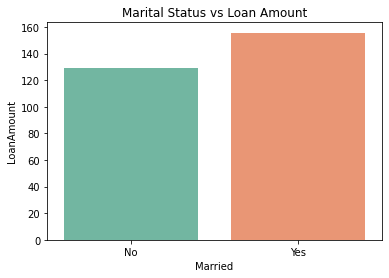

In [9]:
sns.barplot("Married","LoanAmount",data=train,palette="Set2",ci=None)
plt.title("Marital Status vs Loan Amount")
plt.show()

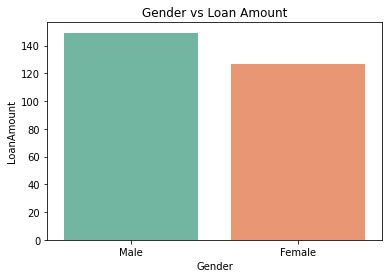

In [10]:
sns.barplot("Gender","LoanAmount",data=train,palette="Set2",ci=None)
plt.title("Gender vs Loan Amount")
plt.show()

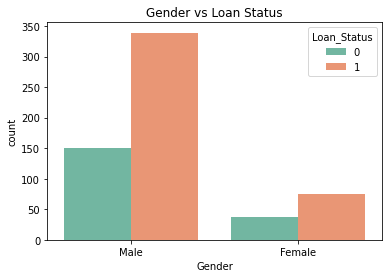

In [11]:
sns.countplot("Gender",hue="Loan_Status",data=train,palette="Set2")
plt.title("Gender vs Loan Status")
plt.show()

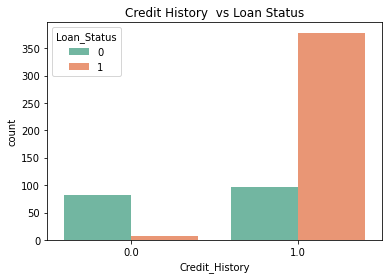

In [12]:
sns.countplot("Credit_History",hue="Loan_Status",data=train,palette="Set2")
plt.title("Credit History  vs Loan Status")
plt.show()

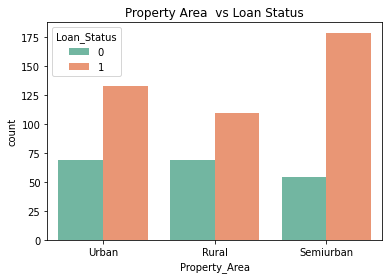

In [13]:
sns.countplot("Property_Area",hue="Loan_Status",data=train,palette="Set2")
plt.title("Property Area  vs Loan Status")
plt.show()

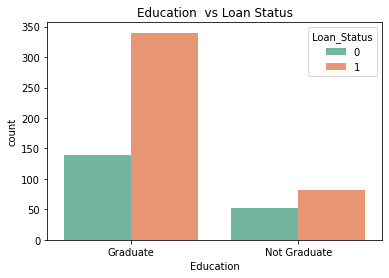

In [14]:
sns.countplot("Education",hue="Loan_Status",data=train,palette="Set2")
plt.title("Education  vs Loan Status")
plt.show()

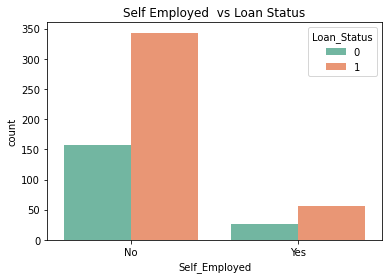

In [15]:
sns.countplot("Self_Employed",hue="Loan_Status",data=train,palette="Set2")
plt.title("Self Employed  vs Loan Status")
plt.show()

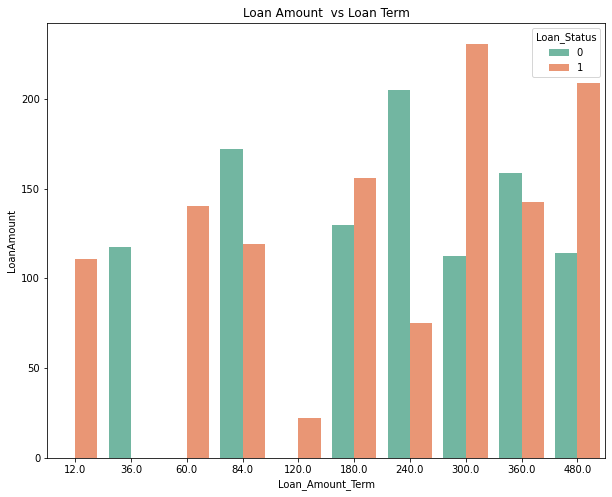

In [16]:
plt.figure(figsize=(10,8))
sns.barplot("Loan_Amount_Term","LoanAmount",hue="Loan_Status",data=train,palette="Set2",ci=None)
plt.title("Loan Amount  vs Loan Term")
plt.show()

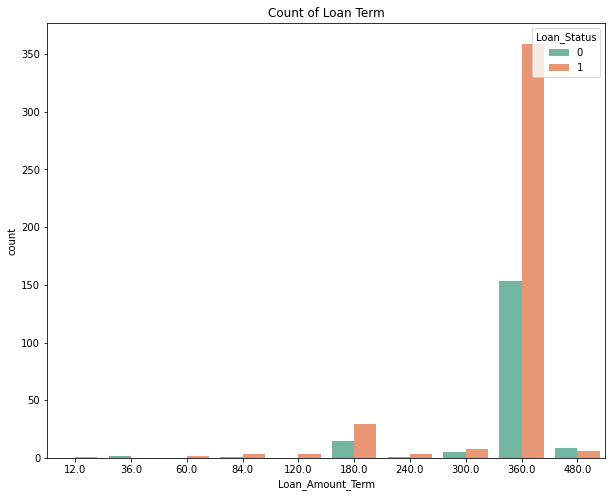

In [17]:
plt.figure(figsize=(10,8))
sns.countplot("Loan_Amount_Term",hue="Loan_Status",data=train,palette="Set2")
plt.title("Count of Loan Term")
plt.show()

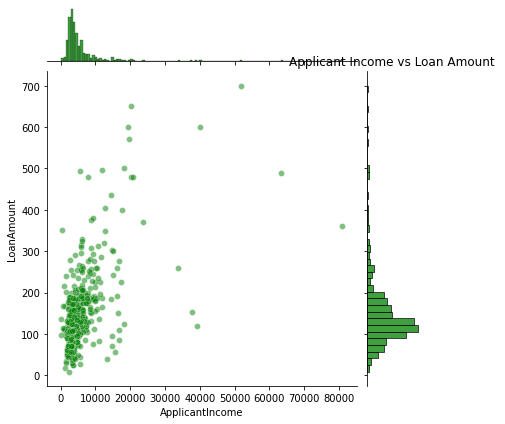

In [18]:
sns.jointplot("ApplicantIncome","LoanAmount",data=train,color="g",alpha=.5)
plt.title("Applicant Income vs Loan Amount ")
plt.show()

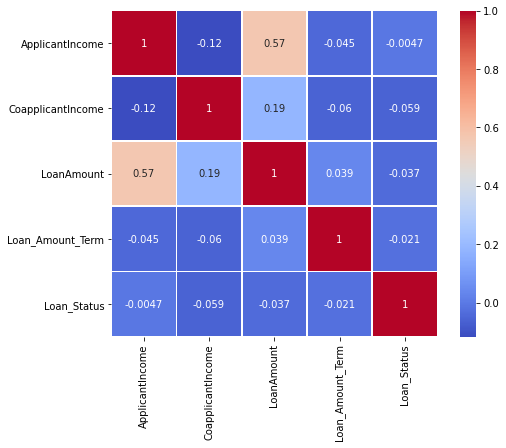

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),annot=True,
            linewidths=.7,
            cmap="coolwarm",square=True)
plt.show()

**Insights observed:**

*   Married people have more loan amount compared to Unmarried.
*   Male have more loan amount compared to Female.
*   No Gender bias in loan approval.
*   Married people have more loan approved.
*  Credit History plays vital role in loan approval.
* People from semi-urban has more loan approved.
* Graduates have more loan approved.
* Salaried people have more loan approval.
* More approved loans are for term of 360 months.
* High Loan amoutns are approved for term of 300 months.
* Applicant Income and Loan amount are correlated.




Data Cleaning

In [20]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Splitting Features into Numeric and Categorical

In [21]:
train_cat_cols=train.select_dtypes(["category","object"]).columns.to_list()
train_num_cols=train.select_dtypes(exclude=["category","object"]).columns.to_list()
print("Train Datset:\n\nCategorical columns are {} :{}\n\nNumeric columns are {} :{}".format(len(train_cat_cols),
                                                                          train_cat_cols,
                                                                          len(train_num_cols),
                                                                          train_num_cols ))

Train Datset:

Categorical columns are 7 :['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

Numeric columns are 5 :['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']


In [22]:
test_cat_cols=test.select_dtypes(["category","object"]).columns.to_list()
test_num_cols=test.select_dtypes(exclude=["category","object"]).columns.to_list()
print("Test Datset:\n\nCategorical columns are {} :{}\n\nNumeric columns are {} :{}".format(len(test_cat_cols),
                                                                          test_cat_cols,
                                                                          len(test_num_cols),
                                                                          test_num_cols ))

Test Datset:

Categorical columns are 7 :['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

Numeric columns are 4 :['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


### Checking for missing values

In [23]:
train[train_num_cols].isnull().sum() #Train dataset Numeric Features

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Loan_Status           0
dtype: int64

In [24]:
train[train_cat_cols].isnull().sum() #Train dataset Categorical Features

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
dtype: int64

In [25]:
test[test_cat_cols].isnull().sum() #Test dataset Numeric Features

Gender            11
Married            0
Dependents        10
Education          0
Self_Employed     23
Credit_History    29
Property_Area      0
dtype: int64

In [26]:
test[test_cat_cols].isnull().sum() #Test dataset Categorical Features

Gender            11
Married            0
Dependents        10
Education          0
Self_Employed     23
Credit_History    29
Property_Area      0
dtype: int64

Imputing Numerical missing values

In [27]:
train_missing_num_col=[]
for col in train_num_cols:
  if  train[col].isnull().sum()>0:
    train_missing_num_col.append(col)

print("Number of Numeric columns with missing values are {} and columns are :{}".format(len(train_missing_num_col),
                                                                                train_missing_num_col) )

Number of Numeric columns with missing values are 2 and columns are :['LoanAmount', 'Loan_Amount_Term']


In [28]:
train[train_missing_num_col].agg(['mean','median','skew']).T

,mean,median,skew
LoanAmount,146.412162,128.0,2.677552
Loan_Amount_Term,342.000000,360.0,-2.362414


In [29]:
for col in train_missing_num_col:
  train[col]=train[col].fillna(train[col].median())  #imputing with median

In [30]:
test_missing_num_col=[]
for col in test_num_cols:
  if  test[col].isnull().sum()>0:
    test_missing_num_col.append(col)

print("Number of Numeric columns with missing values are {} and columns are :{}".format(len(test_missing_num_col),
                                                                                test_missing_num_col) )

Number of Numeric columns with missing values are 2 and columns are :['LoanAmount', 'Loan_Amount_Term']


In [31]:
for col in test_missing_num_col:
  test[col]=test[col].fillna(test[col].median())  #imputing with median

Imputing Categorical missing values

In [32]:
train_missing_cat_col=[]
for col in train_cat_cols:
  if  train[col].isnull().sum()>0:
    train_missing_cat_col.append(col)

print("Number of Numeric columns with missing values are {} and columns are :{}".format(len(train_missing_cat_col),
                                                                                train_missing_cat_col) )

Number of Numeric columns with missing values are 5 and columns are :['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']


In [33]:
for col in train_missing_cat_col:
  train[col]=train[col].fillna(train[col].mode()[0])  #Imputing with mode

In [34]:
test_missing_cat_col=[]
for col in test_cat_cols:
  if  test[col].isnull().sum()>0:
    test_missing_cat_col.append(col)

print("Number of Numeric columns with missing values are {} and columns are :{}".format(len(test_missing_cat_col),
                                                                                test_missing_cat_col) )

Number of Numeric columns with missing values are 4 and columns are :['Gender', 'Dependents', 'Self_Employed', 'Credit_History']


In [35]:
for col in test_missing_cat_col:
  test[col]=test[col].fillna(test[col].mode()[0])  #Imputing with mode

Checking Imputation

In [36]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [38]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Feature Engineering

In [39]:
train["Total_income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
test["Total_income"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [40]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [41]:
train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1,inplace=True)
test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1,inplace=True)

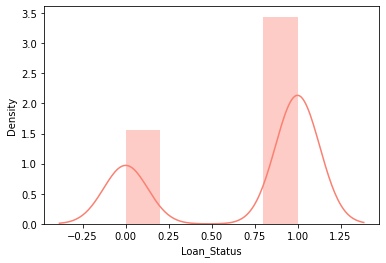

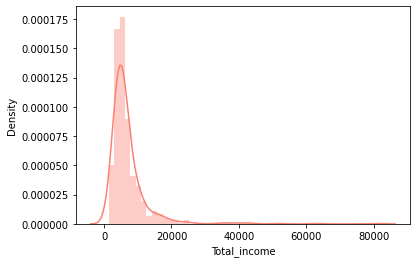

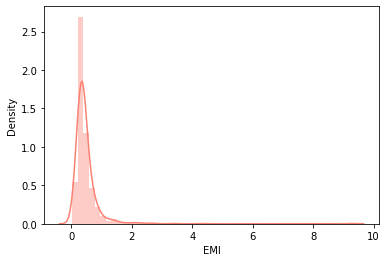

In [42]:
for col in train.select_dtypes("number"):
  sns.distplot(train[col],color="salmon")
  plt.show() 

### Log Transforming skewed features

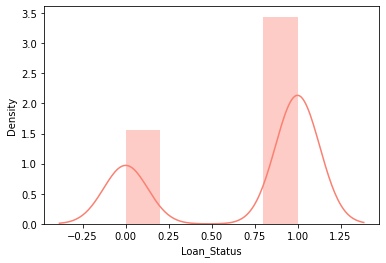

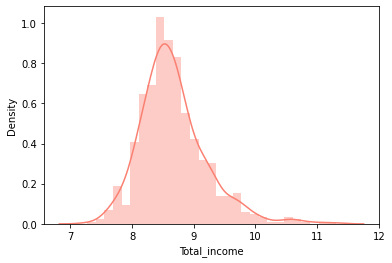

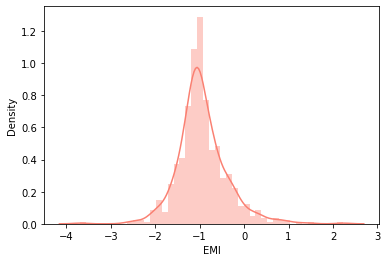

In [43]:
train.Total_income = np.log(train.Total_income)
test.Total_income = np.log(test.Total_income)
train.EMI = np.log(train.EMI)
test.EMI = np.log(test.EMI)

for col in train.select_dtypes("number"):
  sns.distplot(train[col],color="salmon")
  plt.show() 

### Feature Encoding 

In [44]:
print("Train dataset")
for col in train.select_dtypes("object"):
    print("For column {} Number of Unique values : {} Values are : {}".format(col,
                                                                    train[col].nunique(),
                                                                    train[col].unique()
                                                                    ))

Train dataset
For column Gender Number of Unique values : 2 Values are : ['Male' 'Female']
For column Married Number of Unique values : 2 Values are : ['No' 'Yes']
For column Dependents Number of Unique values : 4 Values are : ['0' '1' '2' '3+']
For column Education Number of Unique values : 2 Values are : ['Graduate' 'Not Graduate']
For column Self_Employed Number of Unique values : 2 Values are : ['No' 'Yes']
For column Property_Area Number of Unique values : 3 Values are : ['Urban' 'Rural' 'Semiurban']


In [45]:
print("Test dataset")
for col in test.select_dtypes("object"):
    print("For column {} Number of Unique values : {} Values are : {}".format(col,
                                                                    test[col].nunique(),
                                                                    test[col].unique()
                                                                    ))

Test dataset
For column Gender Number of Unique values : 2 Values are : ['Male' 'Female']
For column Married Number of Unique values : 2 Values are : ['Yes' 'No']
For column Dependents Number of Unique values : 4 Values are : ['0' '1' '2' '3+']
For column Education Number of Unique values : 2 Values are : ['Graduate' 'Not Graduate']
For column Self_Employed Number of Unique values : 2 Values are : ['No' 'Yes']
For column Property_Area Number of Unique values : 3 Values are : ['Urban' 'Semiurban' 'Rural']


In [46]:
train.Dependents=train.Dependents.replace("3+","3")
train.Dependents=train.Dependents.astype("int")

In [47]:
test.Dependents=test.Dependents.replace("3+","3")
test.Dependents=test.Dependents.astype("int")

Splitting Train dataset to Features and Label

In [48]:
X=train.drop("Loan_Status",axis=1)
y=train.Loan_Status

One-Hot Encoding

In [49]:
cat_col_index=[]
for col in X.select_dtypes("object"):
  cat_col_index.append(X.columns.get_loc(col))
cat_col_index

[0, 1, 3, 4, 6]

In [50]:
ct=ColumnTransformer(transformers=[("ohe",OneHotEncoder(drop="first"),cat_col_index)],remainder="passthrough")
X=ct.fit_transform(X)
test=ct.transform(test)


Splitting train data to Training and Validation set

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

### Model Building

### Logistic Regression

In [52]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
lg.score(X_train,y_train),lg.score(X_test,y_test)

(0.814663951120163, 0.7886178861788617)

In [54]:
print(classification_report(y_test,lg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



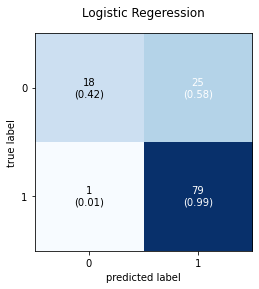

In [55]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,lg.predict(X_test)),
                                                show_normed=True
                                                )
plt.title("Logistic Regeression")
plt.show()

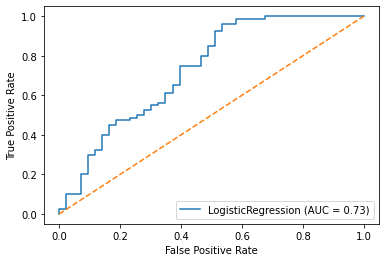

In [56]:
plot_roc_curve(lg,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

Random Forest Classifier

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rf.score(X_train,y_train),rf.score(X_test,y_test)

(1.0, 0.7723577235772358)

In [59]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



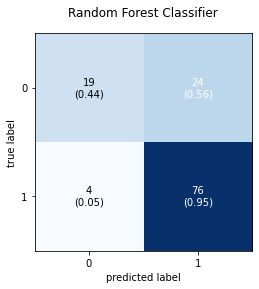

In [60]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,rf.predict(X_test)),
                                                show_normed=True
                                                )
plt.title("Random Forest Classifier")
plt.show()

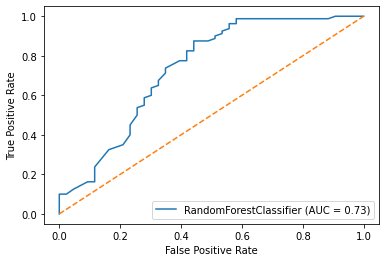

In [61]:
plot_roc_curve(rf,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

Grid Search 

In [62]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
model=RandomForestClassifier()
param_grid={ "max_features":["auto","sqrt"],
            "max_depth":[int(x) for x in np.linspace(4,20,17)],
            "criterion":["gini",'entropy'],
            "min_samples_leaf":[int(x) for x in np.linspace(3,20,18)],
            "min_samples_split":[int(x) for x in np.linspace(3,20,18)],
            "oob_score":[True,False],
            "n_estimators":[int(x) for x in np.linspace(100,1500,15)]
}
grid=RandomizedSearchCV(model,
                  param_grid,
                  n_jobs=-1,
                  refit=True)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [63]:
print(classification_report(y_test,grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



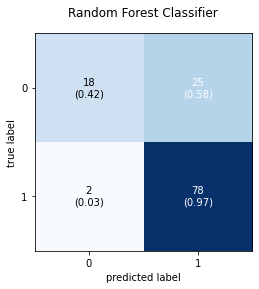

In [64]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,grid.predict(X_test)),
                                                show_normed=True
                                                )
plt.title("Random Forest Classifier")
plt.show()

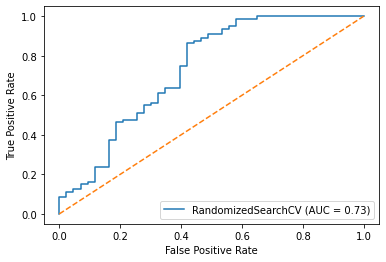

In [65]:
plot_roc_curve(grid,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

In [66]:
y.value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [67]:
from xgboost import XGBClassifier
xb=XGBClassifier()
xb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [68]:
print(classification_report(y_test,xb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123



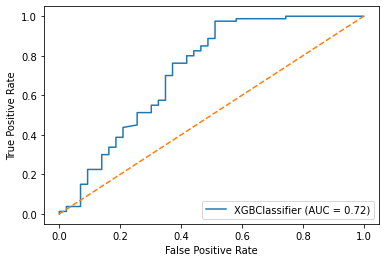

In [69]:
plot_roc_curve(xb,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

In [70]:
test_predicted_loan_approval=grid.predict(test)